In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [15]:
class SingleLayerNN:
    def __init__(self, input_dim, seed=42):
        np.random.seed(seed)
        self.input_dim = input_dim
        self.weights = np.random.randn(input_dim, 1)
        self.bias = np.random.randn(1)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_der(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def f_propagation(self, inputs):
        z = np.dot(inputs, self.weights) + self.bias
        return self.sigmoid(z)
    
    def loss(self, predictions, targets):
        #introduced epsilon value to evade infinity values
        epsilon = 1e-10
        predictions = np.clip(predictions, epsilon, 1 - epsilon)
        loss =  -np.mean(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions))
        return loss
    
    def b_propagation(self, inputs, predictions, targets, learning_rate):
        delta_w = learning_rate * np.dot(inputs.T, (targets - predictions))
        delta_b = learning_rate * (targets - predictions)
        print(delta_b.shape, delta_w.shape)
        return delta_w, delta_b

    def update_weights_and_biases(self, delta_w, delta_b):
        self.weights = self.weights + delta_w
        self.bias = self.bias + delta_b

    def train(self, inputs, targets, epochs=1000, learning_rate=0.01, showIterations = True):
        for i in range(epochs):
            predictions = self.f_propagation(inputs)
            loss = self.loss(targets, predictions)
            delta_w, delta_b = self.b_propagation(inputs, predictions, targets, learning_rate)
            self.update_weights_and_biases(delta_w, delta_b)
            if showIterations == True:
                print('Iteration: '+str(i)+', Loss:'+str(loss))
    
    def predict(self, x):
        predictions = self.f_propagation(x)
        return np.round(predictions)
    
    def plot_decision_boundary(self, inputs, targets, title):
        x_min , x_max = inputs[:, 0]. min() - 1, inputs[:, 0]. max() + 1
        x_values = np.linspace(x_min , x_max , 200)
        y_values = ((-self.weights[0] / self.weights[1]) * x_values) - (self.bias / self.weights[1])
        
        if y_values.shape == (200, 200):
            y_values = y_values[0, :]

        plt.figure(figsize=(8, 6))
        plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, s=20)
        plt.plot(x_values, y_values, label='Decision Boundary')
        plt.xlim(x_min, x_max)
        plt.ylim(inputs[:, 1]. min() - 1, inputs[:, 1]. max() + 1)
        plt.title(title)
        plt.grid(True)
        plt.show()  

In [3]:
n_samples = 100
features_class_0 = np.random.randn(n_samples , 2) + [2, -2] # Class 0
features_class_1 = np.random.randn(n_samples , 2) + [-2, 2] # Class 1
inputs = np.vstack((features_class_0, features_class_1))
targets = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

#standardize the features
inputs = (inputs - np.mean(inputs, axis=0)) / np.std(inputs, axis=0)

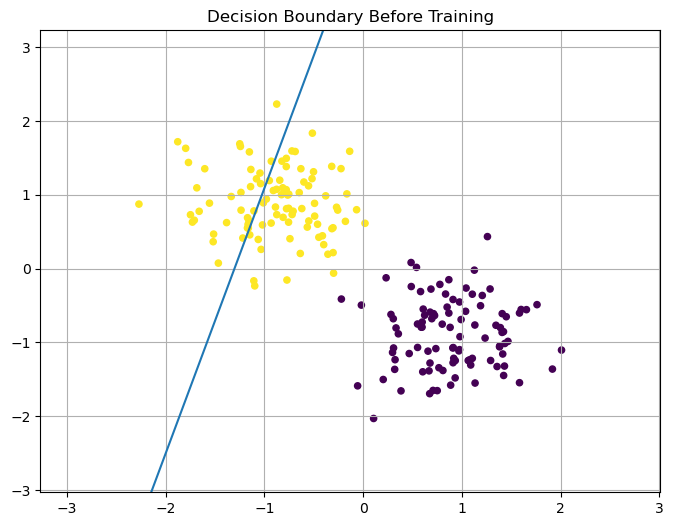

In [16]:
model = SingleLayerNN(input_dim=2)
model.plot_decision_boundary(inputs, targets, title='Decision Boundary Before Training')

(200, 200) (2, 200)
(200, 200) (2, 200)
(200, 200) (2, 200)
(200, 200) (2, 200)
(200, 200) (2, 200)
(200, 200) (2, 200)
(200, 200) (2, 200)
(200, 200) (2, 200)
(200, 200) (2, 200)
(200, 200) (2, 200)


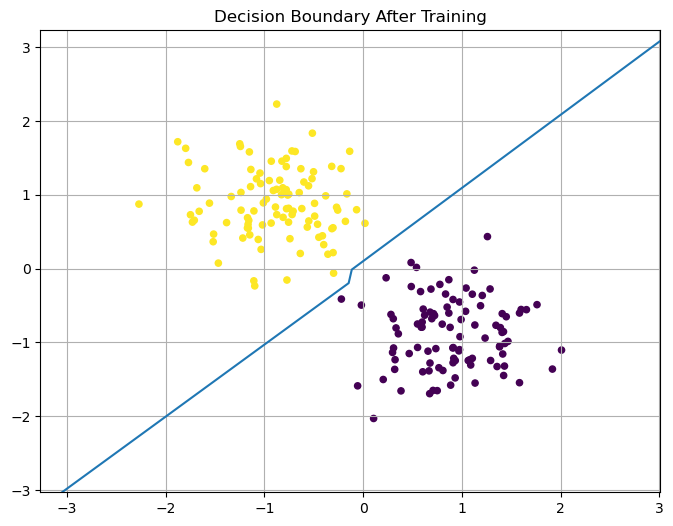

In [17]:
model_trained = SingleLayerNN(input_dim=2)
model_trained.train(inputs, targets, epochs=10, learning_rate=0.5, showIterations=False)
model_trained.plot_decision_boundary(inputs, targets, title='Decision Boundary After Training')